In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing datasets
df_crime = pd.read_csv('csv_crime/qol-safety.csv')
df_engagement = pd.read_csv('csv_demo/qol-engagement.csv')
df_character = pd.read_csv('csv_demo/qol-character.csv')
df_economy = pd.read_csv('csv_eco/qol-economy.csv')
df_education = pd.read_csv('csv_edu/qol-education.csv')
df_health = pd.read_csv('csv_health/qol-health.csv')
df_env = pd.read_csv('csv_health/qol-environment.csv')
df_housing = pd.read_csv('csv_housing/qol-housing.csv')
df_transp = pd.read_csv('csv_transport/qol-transportation.csv')

df_crime.head()
cols=[col for col in df_crime.columns if 'Violent_Crime_Rate' in col]
Violence_crime=df_crime[cols]
Violence_crime.columns=['2016','2015','2013','2011']

In [3]:
merge_table = pd.merge(df_crime,df_engagement, on="NPA")
merge_table = pd.merge(merge_table,df_character, on="NPA")
merge_table = pd.merge(merge_table,df_economy, on="NPA")
merge_table = pd.merge(merge_table,df_education, on="NPA")
merge_table = pd.merge(merge_table,df_health, on="NPA")
merge_table = pd.merge(merge_table,df_env, on="NPA")
merge_table = pd.merge(merge_table,df_housing, on="NPA")
merge_table = pd.merge(merge_table,df_transp, on="NPA")

In [4]:
merge_table =merge_table.set_index('NPA')

In [5]:
filter_col_2013 = [col for col in merge_table if col.endswith('2013')]
filter_col_2014 = [col for col in merge_table if col.endswith('2014')]
filter_col_2015 = [col for col in merge_table if col.endswith('2015')]
filter_col_2016 = [col for col in merge_table if col.endswith('2016')]
filter_col_2011 = [col for col in merge_table if col.endswith('2011')]
filter_col_2012 = [col for col in merge_table if col.endswith('2012')]

In [6]:
data_2011=merge_table[filter_col_2011]
data_2012=merge_table[filter_col_2012]
data_2013=merge_table[filter_col_2013]
data_2014=merge_table[filter_col_2014]
data_2015=merge_table[filter_col_2015]
data_2016=merge_table[filter_col_2016]

In [7]:
#Removing Outliers
Q1 = data_2015.quantile(0.25)
Q3 = data_2015.quantile(0.75)
IQR = Q3 - Q1
mask=((data_2015 < (Q1 - 1.5 * IQR)) | (data_2015 > (Q3 + 1.5 * IQR)))
data_2015[mask] = np.nan

In [8]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(data_2015.iloc[:, :])
data_2015.iloc[:, :] = imputer.transform(data_2015.iloc[:, :])

In [180]:
#Building Regression Base
X=(data_2015.drop(["Home_Sales_Price_2015"], axis=1))
X=pd.DataFrame(X)

In [181]:
X

,Violent_Crime_Rate_2015,Violent_Crimes_2015,Property_Crime_Rate_2015,Property_Crimes_2015,Disorder_Call_Rate_2015,Disorder_Calls_2015,Animal_Control_Call_Rate_2015,Animal_Control_Calls_2015,Fire_Call_Rate_2015,Fire_Calls_2015,...,Housing_Violations_2015,Housing_Violations_Total_2015,Home_Ownership_2015,Home_Ownership_moe_2015,Bicycle_Friendliness_2015,Street_Connectivity_2015,Transit_Proximity_2015,Transit_Proximate_Units_2015,Transit_Ridership_2015,Transit_Ridership_Total_2015
NPA,,,,,,,,,,,,,,,,,,,,,
2,4.500000,10.000000,31.100000,69.000000,196.80000,436.000000,36.200000,78.000000,38.40000,85.000000,...,0.930000,10.000000,35.0,5.000000,1.500000,1.200000,100.0,1079.00,35.00,879.000000
3,2.100000,17.000000,61.100000,52.423168,183.20000,199.680798,26.200000,74.762025,64.80000,49.504651,...,0.170000,8.000000,47.0,4.000000,1.428256,1.159607,100.0,547.48,34.00,330.453674
4,0.900000,1.000000,19.500000,21.000000,46.40000,50.000000,7.400000,22.000000,44.50000,48.000000,...,0.000000,0.000000,100.0,0.000000,1.700000,1.170000,94.0,381.00,8.00,59.000000
5,3.222596,14.000000,67.100000,50.000000,318.10000,237.000000,33.975765,74.000000,41.60000,31.000000,...,0.657427,5.564841,25.0,14.000000,1.600000,1.160000,100.0,331.00,17.00,66.000000
6,3.222596,6.873239,26.694104,174.000000,99.20475,199.680798,33.975765,74.762025,64.40000,111.000000,...,0.657427,5.564841,28.0,11.000000,1.800000,1.300000,100.0,817.00,74.00,1258.000000
7,0.000000,0.000000,22.100000,29.000000,101.50000,133.000000,14.500000,35.000000,24.87338,91.000000,...,0.000000,0.000000,100.0,0.000000,1.500000,1.190000,74.0,314.00,30.00,178.000000
8,0.500000,1.000000,16.800000,31.000000,89.70000,166.000000,28.000000,63.000000,37.80000,70.000000,...,0.190000,2.000000,70.0,11.000000,1.300000,1.160000,99.0,1015.00,9.00,209.000000
9,3.300000,2.000000,37.900000,23.000000,143.30000,87.000000,46.800000,22.000000,44.50000,27.000000,...,0.660000,2.000000,65.0,15.000000,1.700000,1.380000,100.0,302.00,25.00,197.000000
10,11.500000,6.873239,77.600000,52.423168,293.40000,199.680798,59.700000,74.762025,42.00000,49.504651,...,0.657427,5.564841,36.0,6.000000,1.600000,1.350000,100.0,1592.00,42.00,1528.000000


In [182]:
X=X.reset_index()

In [183]:
X.head()

,NPA,Violent_Crime_Rate_2015,Violent_Crimes_2015,Property_Crime_Rate_2015,Property_Crimes_2015,Disorder_Call_Rate_2015,Disorder_Calls_2015,Animal_Control_Call_Rate_2015,Animal_Control_Calls_2015,Fire_Call_Rate_2015,...,Housing_Violations_2015,Housing_Violations_Total_2015,Home_Ownership_2015,Home_Ownership_moe_2015,Bicycle_Friendliness_2015,Street_Connectivity_2015,Transit_Proximity_2015,Transit_Proximate_Units_2015,Transit_Ridership_2015,Transit_Ridership_Total_2015
0,2,4.500000,10.000000,31.100000,69.000000,196.80000,436.000000,36.200000,78.000000,38.4,...,0.930000,10.000000,35.0,5.0,1.500000,1.200000,100.0,1079.00,35.0,879.000000
1,3,2.100000,17.000000,61.100000,52.423168,183.20000,199.680798,26.200000,74.762025,64.8,...,0.170000,8.000000,47.0,4.0,1.428256,1.159607,100.0,547.48,34.0,330.453674
2,4,0.900000,1.000000,19.500000,21.000000,46.40000,50.000000,7.400000,22.000000,44.5,...,0.000000,0.000000,100.0,0.0,1.700000,1.170000,94.0,381.00,8.0,59.000000
3,5,3.222596,14.000000,67.100000,50.000000,318.10000,237.000000,33.975765,74.000000,41.6,...,0.657427,5.564841,25.0,14.0,1.600000,1.160000,100.0,331.00,17.0,66.000000
4,6,3.222596,6.873239,26.694104,174.000000,99.20475,199.680798,33.975765,74.762025,64.4,...,0.657427,5.564841,28.0,11.0,1.800000,1.300000,100.0,817.00,74.0,1258.000000


In [184]:
y=data_2015["Home_Sales_Price_2015"]
y=y.reshape(462,1)

In [189]:
print(X.shape)
import statsmodels.api as sn
X = sn.add_constant(X)
print(X)

     const  NPA  Violent_Crime_Rate_2015  Violent_Crimes_2015  \
0      1.0    2                 4.500000            10.000000   
1      1.0    3                 2.100000            17.000000   
2      1.0    4                 0.900000             1.000000   
3      1.0    5                 3.222596            14.000000   
4      1.0    6                 3.222596             6.873239   
5      1.0    7                 0.000000             0.000000   
6      1.0    8                 0.500000             1.000000   
7      1.0    9                 3.300000             2.000000   
8      1.0   10                11.500000             6.873239   
9      1.0   11                 0.800000             2.000000   
10     1.0   12                11.600000            31.000000   
11     1.0   13                 2.800000            10.000000   
12     1.0   14                 1.900000             7.000000   
13     1.0   15                 0.000000             0.000000   
14     1.0   16          

In [190]:
SL = 0.05
import statsmodels.formula.api as sm
numVars = len(X.iloc[0])
for i in range(0, numVars):
    #print(numVars)
    print(i)
    regressor_OLS = sm.OLS(y, X).fit()
    maxVar = max(regressor_OLS.pvalues).astype(float)
    if maxVar > SL:
        for j in range(0, numVars - i):
            if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                X = X.drop(X.columns[j],axis=1)
regressor_OLS.summary()




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     330.9
Date:                Sat, 24 Mar 2018   Prob (F-statistic):          5.91e-240
Time:                        09:18:47   Log-Likelihood:                -5749.6
No. Observations:                 462   AIC:                         1.153e+04
Df Residuals:                     445   BIC:                         1.160e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
311_Requests_2015                         -724.1362    269.291     -2.689      0.007   -1253.376    -194.896
Voter_Participation_2015                  1711.4598    607.011      2.819      0.005     518.495    2904.425
Population_Density_2015                  -1.056e+04   2961.409     -3.567      0.000   -1.64e+04   -4742.496
Older_Adult_Population_2015              -1430.2504    712.623     -2.007      0.045   -2830.775     -29.726
Household_Income_2015                        0.9401      0.170      5.520      0.000       0.605       1.275
Commercial_Size_2015                         0.5722      0.248      2.309      0.021       0.085       1.059
Commercial_Building_Age_2015              1094.9031    234.062      4.678      0.000     634.899    1554.908
High_School_Diploma_moe_2015              1966.4990    762.825      2.578      0.010     467.313    3465.685
SchoolAge_Proximate_Units_2015             -31.8987      9.039     -3.529      0.000     -49.664     -14.134
Proficiency_Middle_School_2015             554.0817    242.716      2.283      0.023      77.069    1031.094
Proficiency_High_School_2015               532.4864    198.902      2.677      0.008     141.582     923.391
Housing_Density_2015                      1.642e+04   6443.153      2.549      0.011    3762.014    2.91e+04
Single_Family_Housing_2015                -639.7008    130.863     -4.888      0.000    -896.887    -382.515
Housing_Size_2015                           37.3086      6.406      5.824      0.000      24.719      49.899
Residential_Renovation_2015               5892.2767   2254.224      2.614      0.009    1462.029    1.03e+04
Residential_Renovation_Permit_Units_2015  1573.4489    475.665      3.308      0.001     638.619    2508.279
Transit_Ridership_Total_2015                19.5556      9.633      2.030      0.043       0.623      38.488
==============================================================================
Omnibus:                       55.763   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.428
Skew:                           0.704   Prob(JB):                     7.75e-24
Kurtosis:                       4.883   Cond. No.                     1.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     330.9
Date:                Sat, 24 Mar 2018   Prob (F-statistic):          5.91e-240
Time:                        09:18:52   Log-Likelihood:                -5749.6
No. Observations:                 462   AIC:                         1.153e+04
Df Residuals:                     445   BIC:                         1.160e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

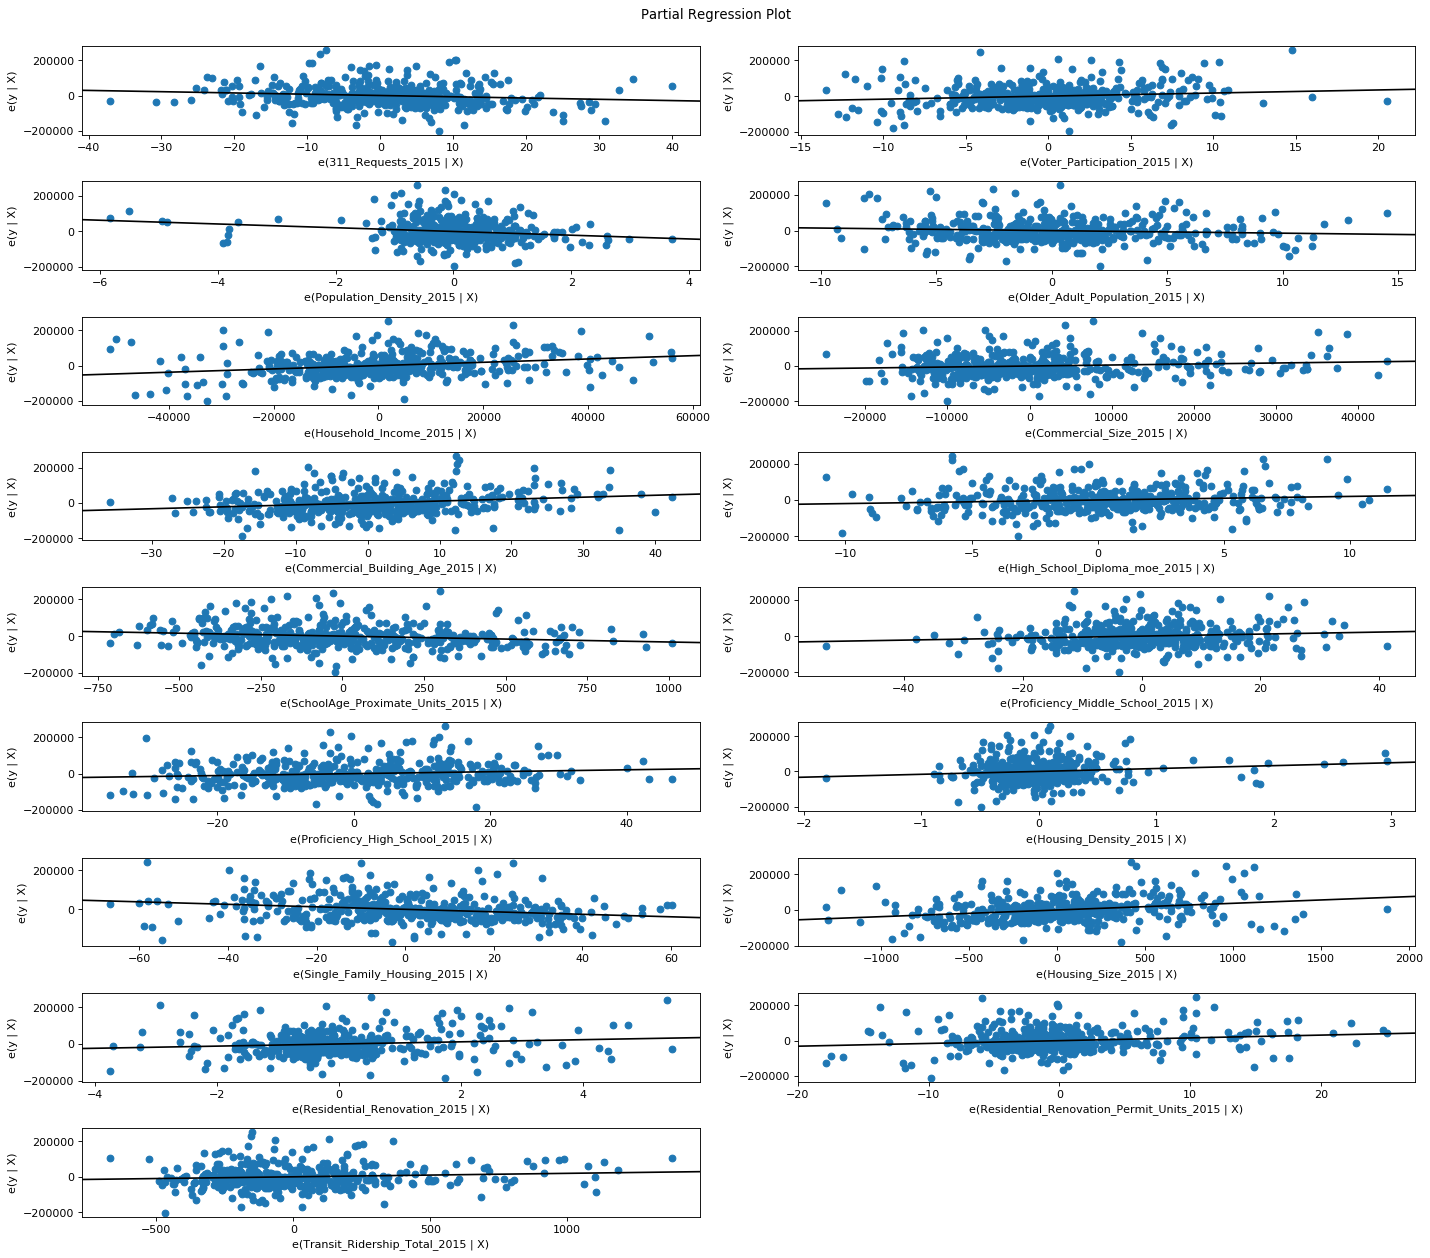

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# use figsize to adjust size, and pass in to plot_regress_exog
#fig = plt.figure(figsize=(15,8))
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

# this produces our partial regression plots
fig = sn.graphics.plot_partregress_grid(regressor_OLS, fig=fig)

X.columns.values
array(['311_Requests_2015', 'Voter_Participation_2015',
       'Population_Density_2015', 'Population _2015',
       'Older_Adult_Population_2015', 'Household_Income_2015',
       'Commercial_Size_2015', 'Commercial_Building_Age_2015',
       'High_School_Diploma_moe_2015', 'Early_Care_Proximity_2015',
       'Early_Care_Proximate_Units_2015', 'Proficiency_Middle_School_2015',
       'Proficiency_High_School_2015', 'Housing_Density_2015',
       'Housing_Units_2015', 'Single_Family_Housing_2015',
       'Housing_Size_2015', 'Residential_Renovation_2015',
       'Residential_Renovation_Permit_Units_2015',
       'Home_Ownership_moe_2015', 'Transit_Ridership_Total_2015'], dtype=object)

In [175]:
len(X.columns)

17

In [148]:
cols =['311_Requests_2016',
'Voter_Participation_2016',
'Population_Density_2016',
'Population _2016',
'Older_Adult_Population_2016',
'Household_Income_2016',
'Commercial_Size_2016',
'Commercial_Building_Age_2016',
'High_School_Diploma_moe_2016',
'Early_Care_Proximity_2016',
'Early_Care_Proximate_Units_2016',
'Proficiency_Middle_School_2016',
'Proficiency_High_School_2016',
'Housing_Density_2016',
'Housing_Units_2016',
'Single_Family_Housing_2016',
'Housing_Size_2016',
'Residential_Renovation_2016',
'Residential_Renovation_Permit_Units_2016',
'Home_Ownership_moe_2016',
'Transit_Ridership_Total_2016']


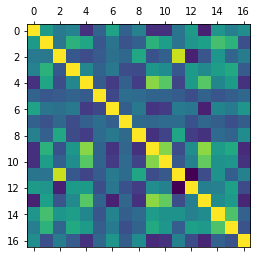

In [176]:
plt.matshow(X.corr())

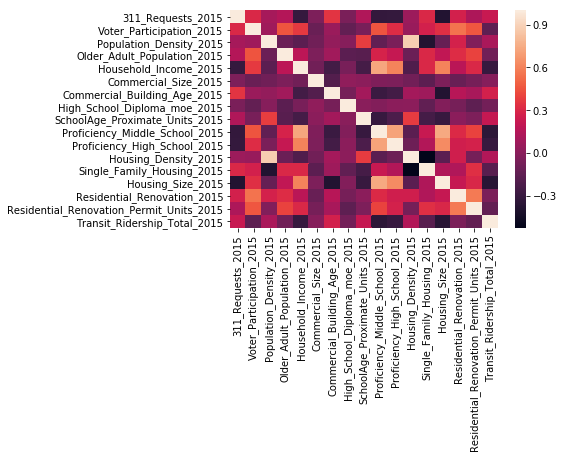

In [178]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [198]:
X2=data_2016.filter(items=cols)

In [206]:
print(X.columns.values)

['311_Requests_2015' 'Voter_Participation_2015' 'Population_Density_2015'
 'Older_Adult_Population_2015' 'Household_Income_2015'
 'Commercial_Size_2015' 'Commercial_Building_Age_2015'
 'High_School_Diploma_moe_2015' 'SchoolAge_Proximate_Units_2015'
 'Proficiency_Middle_School_2015' 'Proficiency_High_School_2015'
 'Housing_Density_2015' 'Single_Family_Housing_2015' 'Housing_Size_2015'
 'Residential_Renovation_2015' 'Residential_Renovation_Permit_Units_2015'
 'Transit_Ridership_Total_2015']


In [207]:
#'Household_Income_2015'

print(X2.columns.values)


['311_Requests_2016' 'Voter_Participation_2016' 'Population_Density_2016'
 'Population _2016' 'Commercial_Size_2016' 'Commercial_Building_Age_2016'
 'Proficiency_Middle_School_2016' 'Proficiency_High_School_2016'
 'Housing_Density_2016' 'Housing_Units_2016' 'Single_Family_Housing_2016'
 'Housing_Size_2016' 'Residential_Renovation_2016'
 'Residential_Renovation_Permit_Units_2016']
